## 2차 과제

- 주제: 데이터 크롤링을 활용한 뉴스 & 리뷰 데이터 분석
- 데이터: 자유롭게 크롤링
- 사용 라이브러리: selenium, beautifulsoup, etc.

### 1. 뉴스 기사 데이터 크롤링

1.1 원하는 뉴스 기사의 본문을 크롤링하시오.

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

news = urlopen('https://n.news.naver.com/mnews/article/015/0004959579?sid=101')
soup_n = BeautifulSoup(news, 'html.parser')

content = soup_n.select_one('#dic_area')
raw_text = content.text
print(raw_text)


DEEP INSIGHT金사과 언제까지이상기후·지방소멸·수입규제고삐 풀린 '애플레이션' 사과 한 개 5000원…1년새 2배 껑충냉해·이상저온 겹쳐 생산량 30% 급감병해충 유입 우려에 수입하기도 힘들어5월 이후 햇과일 늘면 가격 안정될 수도



한국인에게 사과는 늘 곁에 있는 ‘소울 프루트’다. 사과는 저장성 과수로 1년 내내 먹는다. 아침에 먹는 사과는 건강에 좋은 ‘금(金)사과’로 알려져 습관처럼 사과로 아침을 때우는 이도 많다. 제사상에 빠지지 않고 오르는 과일도 사과다. 이런 사과 가격이 급등하자 여론이 들끓고 있다. “사과 한 알에 5000원이라니 믿을 수 없다”는 반응이다. 최근 고공행진하는 신선식품 가격의 상징적인 품목으로 사과를 지목하기도 한다. 사과와 인플레이션을 조합한 ‘애플레이션’이란 신조어까지 등장했다.



최근 사과 가격 급등은 이상 기후로 인해 생산량이 급감했기 때문이다. 지난해 사과 생산량은 전년 대비 30% 줄어든 39만4000t이었다. 공급이 감소하니 자연스레 가격이 올랐다. 사과 가격의 고공행진은 당분간 계속될 전망이다. 전반적인 생산량 감소로 재고 물량이 적은 데다 검역 등의 규제로 당장 수입하기도 어렵기 때문이다. 장기적으로도 기후 변화와 초고령화로 재배지가 줄어들면서 사과 가격이 큰 폭으로 떨어지기는 어려울 것이란 관측이다. 우리 사회가 당장 해결하기 어려운 과제인 △기후 변화 △초고령화 및 지방 소멸 △수입 규제 등이 중첩돼 사과값을 밀어올리고 있는 것이다.이상 기후에 가격 뜀박질



10kg 도매가에 9만원 첫 돌파 사과 10㎏당 도매가가 9만1700원을 기록한 13일 서울의 한 대형마트에 사과가 진열돼 있다.  연합뉴스지난달 신선과실 가격은 전년 동기 대비 41.2% 급등했다. 32년5개월 만의 최대 상승폭이었다. 치솟은 과일 가격은 애플레이션 논란을 더 키웠다. 설을 앞두고 급등한 사과 가격은 상승폭이 다소 둔화하긴 했지만 여전히 1년 전과 비교하면 두 배 높은 수준이다. 13일 팜에어·한경 농산물가격지수(KA

1.2 크롤링한 본문을 단어 단위로 나누고 각 단어가 나온 횟수와 함께 dataframe 형식으로 변환하시오.

In [2]:
#pip install konlpy
## m1 오류 해결 (https://www.codeit.kr/tutorials/44/KoNLPy-%EC%84%A4%EC%B9%98%ED%95%98%EA%B8%B0-M1)

In [3]:
import konlpy
from konlpy.tag import Mecab
## mecab 설치 (https://hwiyong.tistory.com/418)

mecab = Mecab()

In [4]:
tag = []
tag = mecab.pos(raw_text)

words = []

for word, pos in tag:
    if pos in ['NNG', 'NNP']: #NNG: 일반명사, NNP: 고유명사
        words.append(word)

words

['사과',
 '이상',
 '기후',
 '지방',
 '소멸',
 '수입',
 '규제',
 '고삐',
 '애',
 '플레이',
 '션',
 '사과',
 '새',
 '배',
 '냉해',
 '이상',
 '저온',
 '생산량',
 '급감',
 '병해충',
 '유입',
 '우려',
 '수입',
 '이후',
 '햇과일',
 '가격',
 '안정',
 '한국인',
 '사과',
 '곁',
 '소울',
 '프루트',
 '사과',
 '저장',
 '과수',
 '아침',
 '사과',
 '건강',
 '금',
 '金',
 '사과',
 '습관',
 '사과',
 '아침',
 '사상',
 '과일',
 '사과',
 '사과',
 '가격',
 '급등',
 '여론',
 '사과',
 '알',
 '반응',
 '최근',
 '고공',
 '행진',
 '신선',
 '식품',
 '가격',
 '상징',
 '품목',
 '사과',
 '지목',
 '사과',
 '인플레이션',
 '조합',
 '애',
 '플레이',
 '션',
 '신조어',
 '등장',
 '최근',
 '사과',
 '가격',
 '급등',
 '이상',
 '기후',
 '생산량',
 '급감',
 '지난해',
 '사과',
 '생산량',
 '전년',
 '대비',
 '공급',
 '감소',
 '가격',
 '사과',
 '가격',
 '고공',
 '행진',
 '계속',
 '전망',
 '전반',
 '생산량',
 '감소',
 '재고',
 '물량',
 '검역',
 '규제',
 '당장',
 '수입',
 '장기',
 '기후',
 '변화',
 '고령',
 '재배지',
 '사과',
 '가격',
 '폭',
 '관측',
 '사회',
 '당장',
 '해결',
 '과제',
 '기후',
 '변화',
 '고령',
 '지방',
 '소멸',
 '수입',
 '규제',
 '중첩',
 '사과',
 '값',
 '이상',
 '기후',
 '가격',
 '뜀박질',
 '매가',
 '돌파',
 '사과',
 '도매가',
 '기록',
 '서울',
 '마트',
 '사과',
 '진열',
 '연합뉴스',
 '지난달',
 '신선

In [5]:
from collections import Counter
import pandas as pd

count = Counter(words)

df_words = pd.DataFrame({'word':count.keys(), 'count':count.values()})
df_words = df_words.sort_values('count', ascending=False).reset_index(drop=True)

df_words

,word,count
0,사과,53
1,가격,21
2,수입,14
3,과일,9
4,기후,7
...,...,...
322,안전,1
323,확보,1
324,농림,1
325,축산,1


1.3 불용어를 제거하시오.

In [6]:
# 한 글자 단어 확인
one_letter = []

for w in df_words['word']:
    if len(w)==1:
        one_letter.append(w)
        
print(one_letter, end='') #밭,산,값,귤,배,법 제외 불용어 처리

['폭', '애', '전', '션', '밭', '말', '산', '탓', '망', '부', '팜', '값', '알', '사', '금', '순', '일', '金', '간', '곁', '때', '설', '귤', '뒤', '새', '농', '방', '안', '배', '법']

In [7]:
stop_words = ['폭', '애', '전', '션', '말', '탓', '망', '부', '팜', '알', '사', '금', '순', '일', '金', '간', '곁', '때', '설', '뒤', '새', '농', '방', '안']

new_words = [w for w in words if not w in stop_words]
new_words

['사과',
 '이상',
 '기후',
 '지방',
 '소멸',
 '수입',
 '규제',
 '고삐',
 '플레이',
 '사과',
 '배',
 '냉해',
 '이상',
 '저온',
 '생산량',
 '급감',
 '병해충',
 '유입',
 '우려',
 '수입',
 '이후',
 '햇과일',
 '가격',
 '안정',
 '한국인',
 '사과',
 '소울',
 '프루트',
 '사과',
 '저장',
 '과수',
 '아침',
 '사과',
 '건강',
 '사과',
 '습관',
 '사과',
 '아침',
 '사상',
 '과일',
 '사과',
 '사과',
 '가격',
 '급등',
 '여론',
 '사과',
 '반응',
 '최근',
 '고공',
 '행진',
 '신선',
 '식품',
 '가격',
 '상징',
 '품목',
 '사과',
 '지목',
 '사과',
 '인플레이션',
 '조합',
 '플레이',
 '신조어',
 '등장',
 '최근',
 '사과',
 '가격',
 '급등',
 '이상',
 '기후',
 '생산량',
 '급감',
 '지난해',
 '사과',
 '생산량',
 '전년',
 '대비',
 '공급',
 '감소',
 '가격',
 '사과',
 '가격',
 '고공',
 '행진',
 '계속',
 '전망',
 '전반',
 '생산량',
 '감소',
 '재고',
 '물량',
 '검역',
 '규제',
 '당장',
 '수입',
 '장기',
 '기후',
 '변화',
 '고령',
 '재배지',
 '사과',
 '가격',
 '관측',
 '사회',
 '당장',
 '해결',
 '과제',
 '기후',
 '변화',
 '고령',
 '지방',
 '소멸',
 '수입',
 '규제',
 '중첩',
 '사과',
 '값',
 '이상',
 '기후',
 '가격',
 '뜀박질',
 '매가',
 '돌파',
 '사과',
 '도매가',
 '기록',
 '서울',
 '마트',
 '사과',
 '진열',
 '연합뉴스',
 '지난달',
 '신선',
 '과실',
 '가격',
 '전년',
 '동기',
 '대비',
 '급등',
 '최대',
 '상승',
 

1.4 처리한 데이터를 워드아트로 변환해 어떤 단어가 가장 많이 나왔는지 확인하시오(폰트, 색 등 자유).

In [8]:
count = Counter(new_words)

new_df_words = pd.DataFrame({'word':count.keys(), 'count':count.values()})
new_df_words = new_df_words.sort_values('count', ascending=False).reset_index(drop=True)

new_df_words

,word,count
0,사과,53
1,가격,21
2,수입,14
3,과일,9
4,기후,7
...,...,...
298,안전,1
299,확보,1
300,농림,1
301,축산,1


In [9]:
#pip install wordcloud

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

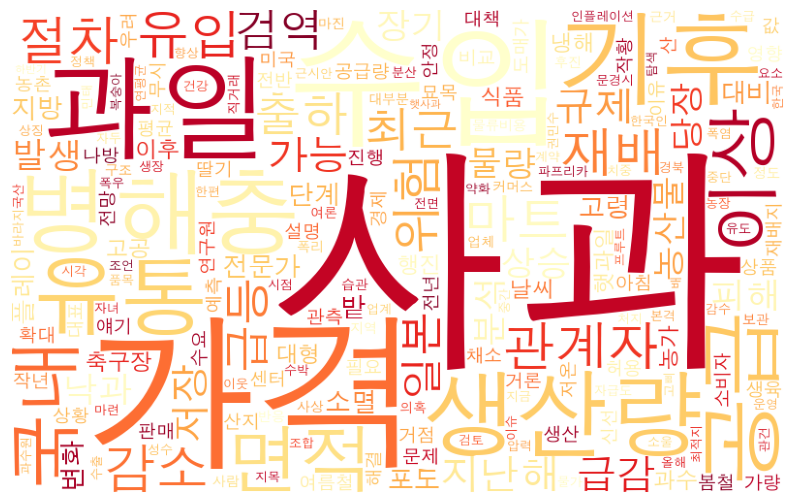

In [11]:
dic_words = new_df_words.set_index('word').to_dict()['count']

wc = WordCloud(random_state = 123, 
               font_path = 'AppleGothic',
               width = 800,
               height = 500, 
               background_color = 'white',
               colormap = 'YlOrRd')

img_wc = wc.generate_from_frequencies(dic_words)

plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wc)

### 2. 플레이스토어 리뷰 데이터 크롤링(동적 크롤링)

2.1 100개 이상의 리뷰를 가진 앱에 있는 댓글 리뷰를 크롤링하시오.

In [12]:
# FLO 앱 아이디 = skplanet.musicmate

In [13]:
# google_play_scraper 사용 (앱스토어 리뷰로 하다가 급하게 바꿔서...)
import google_play_scraper as gps

In [14]:
flo = gps.reviews_all('skplanet.musicmate',
                      sleep_milliseconds = 2000,  
                      lang = 'ko',  
                      country = 'KR',  
                      sort = gps.Sort.NEWEST, #최신순 정렬  
                      filter_score_with = None)
flo

[{'reviewId': '07b59cd3-0630-4d21-b0fb-123a798dae8c',
  'userName': '이모은',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocI_9lFKbrXsvWQ846djshMmV87qbOTkhmHrbb3r3cLJ=mo',
  'content': '노래를 바꾸려고 어플을 열때마다 버퍼링걸린것처럼 노래가멈췄다가 다시 시작되는데 문제개선좀 해주세요 몇일전부터 반복되고있습니다',
  'score': 2,
  'thumbsUpCount': 1,
  'reviewCreatedVersion': '7.7.1',
  'at': datetime.datetime(2024, 3, 18, 6, 47),
  'replyContent': '안녕하세요 이모은 님 FLO입니다. FLO 이용 중 높은 만족감을 드리지 못한 것 같아 무거운 마음입니다😥 이모은 님의 [어플 실행 시 음원 버퍼링 현상]에 대해 자세히 알고 싶어요!👂번거로우시겠지만 현상을 확인할 수 있는 사진캡처 또는 영상을 첨부하시어 스토어상의 닉네임과 함께 FLO 앱 내 [⚙️-고객센터-1:1문의 또는 채팅상담]을 통해 말씀 부탁드립니다!📝신속하게 확인 후 담당 부서에서 조치할 수 있도록 전달할게요! 언제나 이모은 님께서 만족하실만한 서비스를 제공해드리기 위해 노력 중이에요. 불편 사항이 있으시다면 언제든 말씀해 주시면 신속하게 확인 후 답변해 드릴게요🙇\u200d♀️감사합니다!',
  'repliedAt': datetime.datetime(2024, 3, 19, 15, 13, 45),
  'appVersion': '7.7.1'},
 {'reviewId': '523ff913-47ff-4b87-b431-1a6e0bb31221',
  'userName': '선승혜',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocJ_WDgDAjVt0ZxZN4UZnZHnreWHk

2.2 크롤링한 데이터를 dataframe 형태로 변환하시오(날짜, 별점, 리뷰 유저 등).

In [15]:
flo_df = pd.DataFrame(flo)
flo_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,07b59cd3-0630-4d21-b0fb-123a798dae8c,이모은,https://play-lh.googleusercontent.com/a/ACg8oc...,노래를 바꾸려고 어플을 열때마다 버퍼링걸린것처럼 노래가멈췄다가 다시 시작되는데 문제...,2,1,7.7.1,2024-03-18 06:47:00,안녕하세요 이모은 님 FLO입니다. FLO 이용 중 높은 만족감을 드리지 못한 것 ...,2024-03-19 15:13:45,7.7.1
1,523ff913-47ff-4b87-b431-1a6e0bb31221,선승혜,https://play-lh.googleusercontent.com/a/ACg8oc...,"여태까지 잘쓰고 있습니다 근데 지현우 부른 아이야,좋은중독/사거리 그오빠 부른 LO...",4,0,7.7.1,2024-03-17 04:11:20,안녕하세요 선승혜 님 FLO입니다. 우선 저희 FLO를 사용해 주셔서 감사합니다💖확...,2024-03-18 14:03:23,7.7.1
2,1163f56f-4bc4-4f57-854b-ce6fb7394ba4,김ㅎㄹ,https://play-lh.googleusercontent.com/a/ACg8oc...,무료앱이 아닌데요?,1,0,None,2024-03-16 14:04:14,안녕하세요 김ㅎㄹ 님 FLO입니다. FLO 이용 중 높은 만족감을 드리지 못한 것 ...,2024-03-18 14:02:57,None
3,8dd2ea8f-c3b8-48fc-928e-797c5627cfb4,chan,https://play-lh.googleusercontent.com/a-/ALV-U...,다른 앱보다 연령대가 높아서 그런지 ㅇㅇ웅이 너무 많이 떠요...글구 플리 추천도 ...,1,0,7.7.1,2024-03-15 09:43:37,안녕하세요 chan 님 FLO입니다. FLO 이용 중 높은 만족감을 드리지 못한 것...,2024-03-18 14:01:29,7.7.1
4,2fa1895d-24fb-4da1-86c4-119c9804073a,이상엽,https://play-lh.googleusercontent.com/a-/ALV-U...,자동재생으로 시간 맞춰놓고 해당시간에 재생되면 꼭 재생목록 처음곡으로 재생만 됩니다...,1,5,7.7.1,2024-03-13 04:57:05,안녕하세요 이상엽님 FLO입니다. FLO 이용 중 불편을 드리게 되어 죄송한 마음이...,2024-03-13 09:23:53,7.7.1
...,...,...,...,...,...,...,...,...,...,...,...
1189,79b17130-a088-421c-a1d6-6bc11051128e,ㄴㄱㄴㄷ,https://play-lh.googleusercontent.com/a/ACg8oc...,일상생활에 오아시스였습니다.,5,0,4.6.0,2022-06-30 19:16:45,장마가 끝나고 시작된 무더위에☔\nFLO가 ㄴㄱㄴㄷ님의 오아시스가 되어드릴게요🌴,2022-07-01 11:08:52,4.6.0
1190,dc29b4a1-99ff-4f05-998a-035fd45c7dab,한성임,https://play-lh.googleusercontent.com/a-/ALV-U...,궁금한게 있는데 퀸덤 노래 중에서 케플러 더보이즈는 왜 없나요??,5,0,6.1.3,2022-06-30 18:04:09,안녕하세요. FLO 운영팀입니다!💙\n앗💧FLO에서 원하는 곡을 찾지 못하셨다니\n...,2022-07-01 11:08:44,6.1.3
1191,45b9a1e6-e98b-4249-97b5-824b2fd60057,배성한,https://play-lh.googleusercontent.com/a/ACg8oc...,업뎃하고 안드로이드오토에서 홈 둘러보기 최근감상 보관함 다안뜨네요 휴..,2,1,6.6.0,2022-06-30 17:12:48,안녕하세요. FLO 운영팀입니다.💙\nFLO 이용 중 불편함을 드려 무거운 마음입니...,2022-07-01 11:08:36,6.6.0
1192,6923aadf-f984-4af7-8810-92ba2048d607,강마뇽,https://play-lh.googleusercontent.com/a/ACg8oc...,업데후 재생중 끈깁니다,1,2,6.6.0,2022-06-30 17:12:05,안녕하세요. FLO 운영팀입니다.💙\nFLO 이용 중 불편함을 드려 무거운 마음입니...,2022-07-01 11:08:28,6.6.0


In [16]:
flo_df2 = pd.DataFrame({'Date' : flo_df['at'], #날짜
                        'Rating' : flo_df['score'], #별점
                        'Content' : flo_df['content'], #내용
                        'NumofLikes' : flo_df['thumbsUpCount']}) #유용해요 수
flo_df2

,Date,Rating,Content,NumofLikes
0,2024-03-18 06:47:00,2,노래를 바꾸려고 어플을 열때마다 버퍼링걸린것처럼 노래가멈췄다가 다시 시작되는데 문제...,1
1,2024-03-17 04:11:20,4,"여태까지 잘쓰고 있습니다 근데 지현우 부른 아이야,좋은중독/사거리 그오빠 부른 LO...",0
2,2024-03-16 14:04:14,1,무료앱이 아닌데요?,0
3,2024-03-15 09:43:37,1,다른 앱보다 연령대가 높아서 그런지 ㅇㅇ웅이 너무 많이 떠요...글구 플리 추천도 ...,0
4,2024-03-13 04:57:05,1,자동재생으로 시간 맞춰놓고 해당시간에 재생되면 꼭 재생목록 처음곡으로 재생만 됩니다...,5
...,...,...,...,...
1189,2022-06-30 19:16:45,5,일상생활에 오아시스였습니다.,0
1190,2022-06-30 18:04:09,5,궁금한게 있는데 퀸덤 노래 중에서 케플러 더보이즈는 왜 없나요??,0
1191,2022-06-30 17:12:48,2,업뎃하고 안드로이드오토에서 홈 둘러보기 최근감상 보관함 다안뜨네요 휴..,1
1192,2022-06-30 17:12:05,1,업데후 재생중 끈깁니다,2


2.3 긍정 리뷰와 부정 리뷰를 나누시오(기준은 자유).

In [20]:
# 긍정 리뷰
positive = flo_df2[flo_df2['Rating'] >= 4]
positive

,Date,Rating,Content,NumofLikes
1,2024-03-17 04:11:20,4,"여태까지 잘쓰고 있습니다 근데 지현우 부른 아이야,좋은중독/사거리 그오빠 부른 LO...",0
5,2024-03-11 07:29:14,5,결제 원하지 않는데 결제됐어요 ㅠㅠ 환불해주세요,0
7,2024-03-05 23:33:18,4,앨범 장르말고 각각 노래의 장르도 볼 수 있었으면 좋겠어요,0
10,2024-03-04 16:28:19,5,너무 편리하고 좋아요:),0
11,2024-03-04 10:44:01,5,호환되는 핸드폰 좀 늘려주시면 안될까요? 이번에 젬폰2 를 구매했는데 FLO 앱을 ...,0
...,...,...,...,...
1178,2022-07-04 17:56:29,5,노래도 많고 너무 춤 연습 할때 플로가 있으니까 만족 스럽다♥,0
1181,2022-07-03 17:19:44,5,멜론보다 쓰기나은거 같애요! 쓸때 그닥 불편한건 없는거 같애요,0
1183,2022-07-03 10:33:38,5,재생목록 편집이 안됩니다! 갤노트20 사용자고 재생목록순서를 바꾸려하는데 완료를 누...,0
1189,2022-06-30 19:16:45,5,일상생활에 오아시스였습니다.,0


** 별점과 상관없이 환불이나 부정적인 리뷰를 다는 사람이 많아서 긍정 리뷰를 별점으로 구분하면 안될 것 같다.

In [21]:
# 부정 리뷰
negative = flo_df2[flo_df2['Rating'] <= 2]
negative

,Date,Rating,Content,NumofLikes
0,2024-03-18 06:47:00,2,노래를 바꾸려고 어플을 열때마다 버퍼링걸린것처럼 노래가멈췄다가 다시 시작되는데 문제...,1
2,2024-03-16 14:04:14,1,무료앱이 아닌데요?,0
3,2024-03-15 09:43:37,1,다른 앱보다 연령대가 높아서 그런지 ㅇㅇ웅이 너무 많이 떠요...글구 플리 추천도 ...,0
4,2024-03-13 04:57:05,1,자동재생으로 시간 맞춰놓고 해당시간에 재생되면 꼭 재생목록 처음곡으로 재생만 됩니다...,5
8,2024-03-04 20:45:22,1,근대 왜 시간이 1분있어서 갑자기 돈이 내야한다고 했는데 저는 너무 아쉬워서 돈을 ...,0
...,...,...,...,...
1184,2022-07-02 13:37:03,1,머 씨 들으란 애기야 듣지 말라는 애기야 머가 이렇게 끊기냐고 내돈 주고 듣는데 왜...,1
1185,2022-07-01 15:37:57,1,듣던노래가 하나둘씩 없어지는 이유가 머임? 권리자 머라하더니 없어지던데? 갈아타던가...,1
1188,2022-06-30 19:24:19,1,업데이트가 진행되면서 셔플기능이 이상하게 바뀌었네요...이전 곡을 다시 듣고 싶어도...,2
1191,2022-06-30 17:12:48,2,업뎃하고 안드로이드오토에서 홈 둘러보기 최근감상 보관함 다안뜨네요 휴..,1


### 3. 자유 분석

3.1 위에서 크롤링한 데이터들을 활용해 자유롭게 인사이트를 도출하시오.

In [22]:
# 중요한 리뷰 찾기
flo_df2.sort_values(by=['NumofLikes'], ascending=False) #유용한 순
flo_df2['NumofLikes'].mean() #3.29
flo_df2['NumofLikes'].median() #0.0

# 3명 이상의 사람에게 유용해요를 받으면 중요한 리뷰로 판단
impt = flo_df2[flo_df2['NumofLikes'] >= 3]
impt

,Date,Rating,Content,NumofLikes
4,2024-03-13 04:57:05,1,자동재생으로 시간 맞춰놓고 해당시간에 재생되면 꼭 재생목록 처음곡으로 재생만 됩니다...,5
13,2024-03-02 13:56:26,5,음악 듣는데 무난하고 좋은 앱입니다. SKT 100회 무료듣기가 있어서 사용하고 있...,17
24,2024-02-23 09:30:32,3,재생목록에서 아티스트순서로 정렬할 때 노래가 앨범 수록순으로 정렬되었으면 좋겠습니다...,44
32,2024-02-19 23:06:30,4,다 좋은데...음악목록을 직접설정순?이거 말고 아티스트 순이라던가 곡명순 등으로 설...,24
42,2024-02-14 23:18:59,2,"뮤직앱 도장깨기하러 바이브, 유튜브 뮤직에서 넘어온 유저인데요, 정말 너무.. 너무...",12
...,...,...,...,...
1136,2022-07-15 09:42:20,1,뭔데 하루에 백번씩 꺼집니까?,3
1139,2022-07-14 18:27:01,1,블루투스 연결후 노래끊김현상있넉요ㅡㅡ,3
1146,2022-07-12 20:33:51,1,최근 업데이트 이후 aod나 화면에서는 재생중으로 나오는데 음악 재생이 안됩니다 화...,8
1177,2022-07-04 21:13:39,1,대체 왜 다운받은 곡인데 네트워크가 불안정하다느니 하면서 끊기는거죠? 이럴려고 돈 ...,19


In [23]:
# 주요 부정 리뷰
impt_n = impt[impt['Rating'] <= 2]
impt_n

,Date,Rating,Content,NumofLikes
4,2024-03-13 04:57:05,1,자동재생으로 시간 맞춰놓고 해당시간에 재생되면 꼭 재생목록 처음곡으로 재생만 됩니다...,5
42,2024-02-14 23:18:59,2,"뮤직앱 도장깨기하러 바이브, 유튜브 뮤직에서 넘어온 유저인데요, 정말 너무.. 너무...",12
63,2024-01-30 15:52:12,2,안녕하세요. 안드로이드 오토에서 T맵+플로 조합으로 이용을 하고 있는데요 오류증상이...,33
112,2023-12-26 11:27:26,2,노래 추가하고 삭제하는것도 많은 클릭이 필요함.. 직관성이 떨어집니다. 주 사용 연...,4
124,2023-12-16 17:39:05,1,버퍼링 상태에서 음악이 재생 안 됨,6
...,...,...,...,...
1136,2022-07-15 09:42:20,1,뭔데 하루에 백번씩 꺼집니까?,3
1139,2022-07-14 18:27:01,1,블루투스 연결후 노래끊김현상있넉요ㅡㅡ,3
1146,2022-07-12 20:33:51,1,최근 업데이트 이후 aod나 화면에서는 재생중으로 나오는데 음악 재생이 안됩니다 화...,8
1177,2022-07-04 21:13:39,1,대체 왜 다운받은 곡인데 네트워크가 불안정하다느니 하면서 끊기는거죠? 이럴려고 돈 ...,19


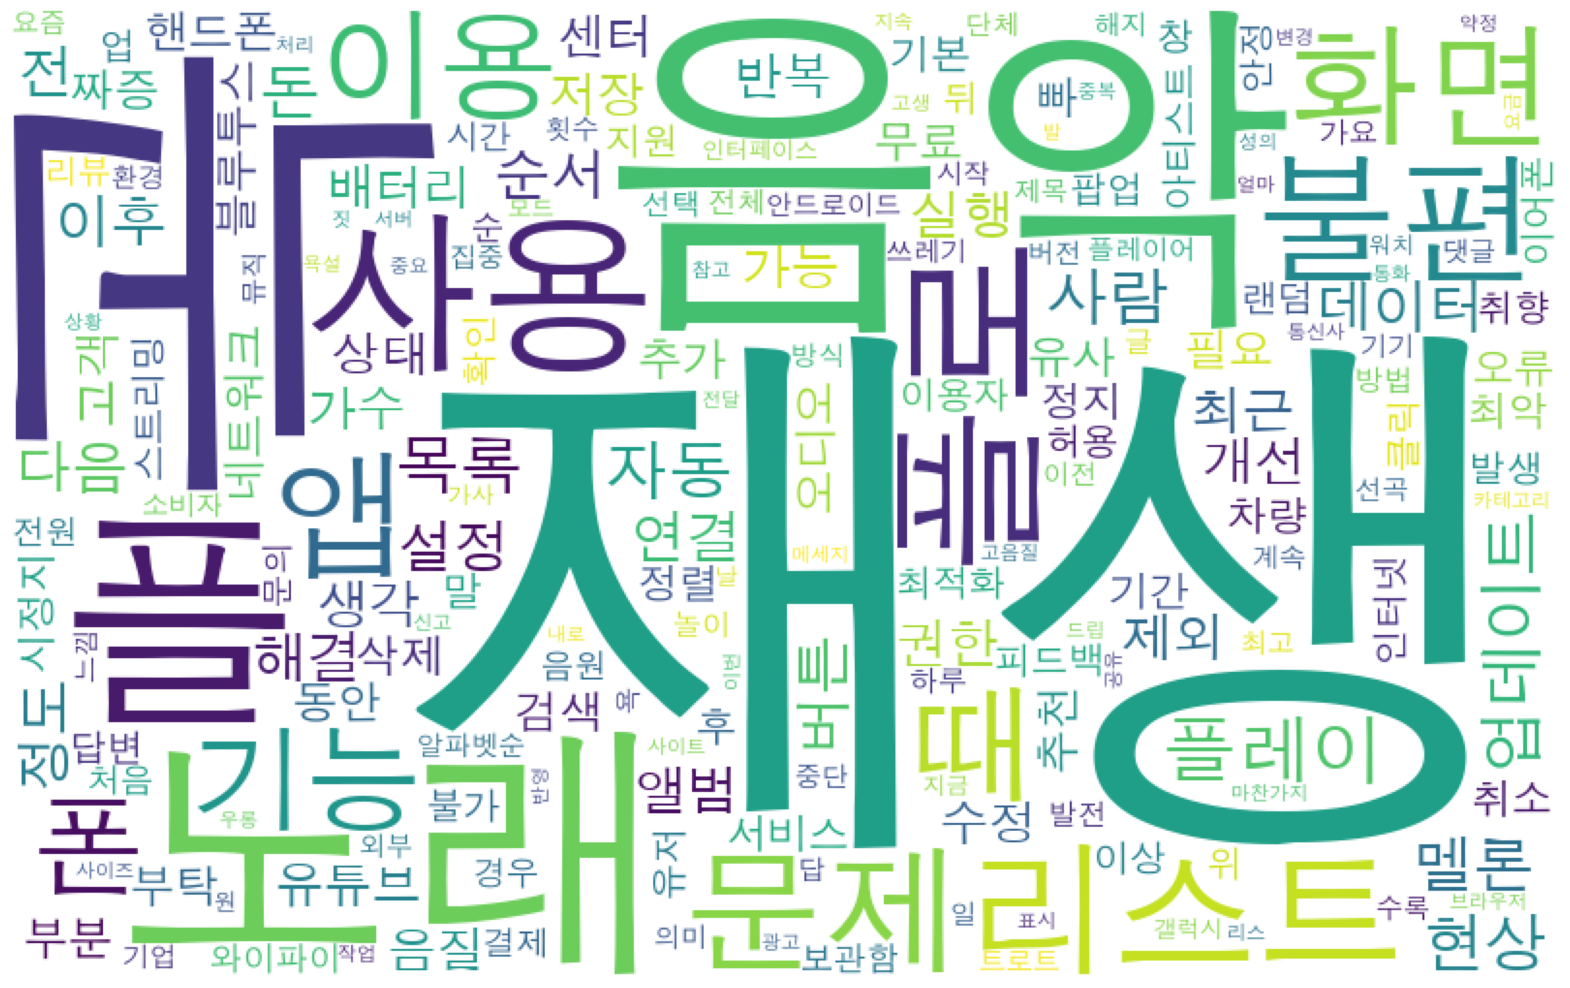

In [27]:
# 주요 부정 리뷰 분석
n_text = ' '.join(impt_n['Content'])

tag_n = []
tag_n = mecab.pos(n_text)

words_n = []

for word, pos in tag_n:
    if pos in ['NNG', 'NNP']: #NNG: 일반명사, NNP: 고유명사
        words_n.append(word)

count = Counter(words_n)

new_words_n = pd.DataFrame({'word':count.keys(), 'count':count.values()})
new_words_n = new_words_n.sort_values('count', ascending=False).reset_index(drop=True)

# 워드클라우드
dic_words_n = new_words_n.set_index('word').to_dict()['count']

wc_n = WordCloud(random_state = 123, 
                 font_path = 'AppleGothic',
                 width = 800,
                 height = 500, 
                 background_color = 'white')

img_wc_n = wc_n.generate_from_frequencies(dic_words_n)

plt.figure(figsize = (20, 20))
plt.axis('off')
plt.imshow(img_wc_n)

재생, 사용, 화면, 기능 등이 큰 키워드로 등장하는 것으로 보아 기능적인 부분에 불만을 가진 사람들이 많은 것 같다. 음악, 곡, 노래 등의 키워드를 보면 원하는 음악이 없어서 낮은 별점을 주는 경우도 있는 듯하다. 재생과 관련된 앱 기능을 보완하고 원하는 음악을 쉽게 신청할 수 있게 만들면 좋을 것 같다.